In [54]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [55]:
dataset=pd.read_csv("C:/Users/56961/Desktop/ProyectoMLCEN/dataset.csv/dataset.csv",sep=";")

In [56]:
dataset.drop(["node"],inplace=True,axis=1)

In [57]:
dataset["date"]=pd.to_datetime(dataset["date"],format="%Y-%m-%d %H:%M:%S")

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242968 entries, 0 to 2242967
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   consumption  float64       
 1   substation   object        
 2   date         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 51.3+ MB


In [59]:
dataset.head()

,consumption,substation,date
0,-2.762882,AJAHUEL,2017-04-01
1,-119.559726,BUIN,2017-04-01
2,64.807776,BUIN,2017-04-01
3,-4.348032,LOSALME,2017-04-01
4,69.637895,LOSALME,2017-04-01


In [60]:
train=dataset.query("date.dt.year>2017 and date.dt.year <2022")

In [61]:
test=dataset.query("date.dt.year==2022")

In [62]:
serie_test=test.groupby(["substation","date"]).agg("sum")
serie_test.to_csv("test.csv")

In [63]:
serie_train=train.groupby(["substation","date"]).agg("sum")
serie_train.to_csv("train.csv")

In [64]:
ds_train=pd.read_csv("train.csv")
ds_train["date"]=pd.to_datetime(ds_train["date"],format="%Y-%m-%d %H:%M:%S")
ds_train=ds_train.set_index("date")
ds_train.head()

,substation,consumption
date,,
2018-01-01 00:00:00,AJAHUEL,137.330840
2018-01-01 01:00:00,AJAHUEL,124.045549
2018-01-01 02:00:00,AJAHUEL,118.137811
2018-01-01 03:00:00,AJAHUEL,107.899499
2018-01-01 04:00:00,AJAHUEL,100.362069


In [65]:
ds_test=pd.read_csv("test.csv")
ds_test["date"]=pd.to_datetime(ds_test["date"],format="%Y-%m-%d %H:%M:%S")
ds_test=ds_test.set_index("date")
ds_test.head()

,substation,consumption
date,,
2022-01-01 00:00:00,AJAHUEL,102.093131
2022-01-01 01:00:00,AJAHUEL,82.379086
2022-01-01 02:00:00,AJAHUEL,75.126780
2022-01-01 03:00:00,AJAHUEL,69.140084
2022-01-01 04:00:00,AJAHUEL,66.442176


In [66]:
subestaciones=["AJAHUEL","BUIN","CHENA","CNAVIA","ELSALTO","FLORIDA","LOSALME"]

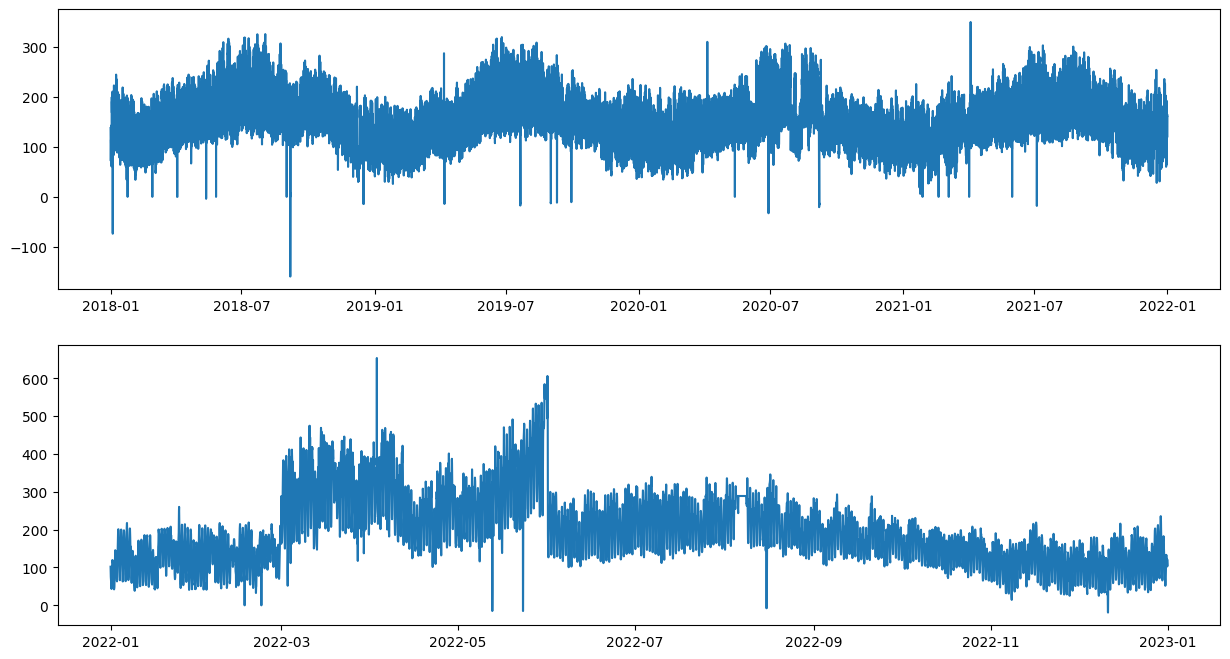

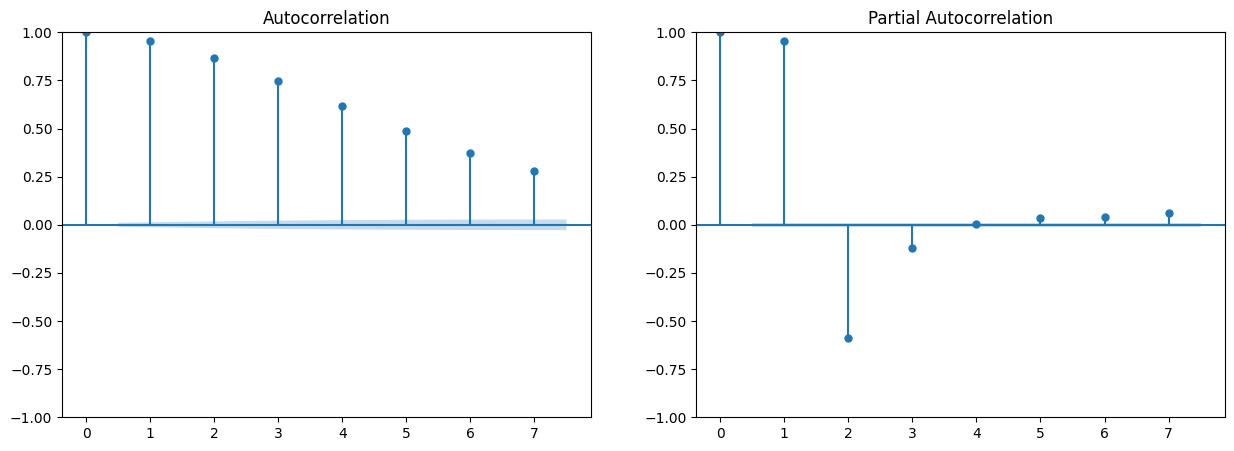

In [67]:
subestacion="AJAHUEL"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

<Axes: xlabel='hour', ylabel='consumption'>

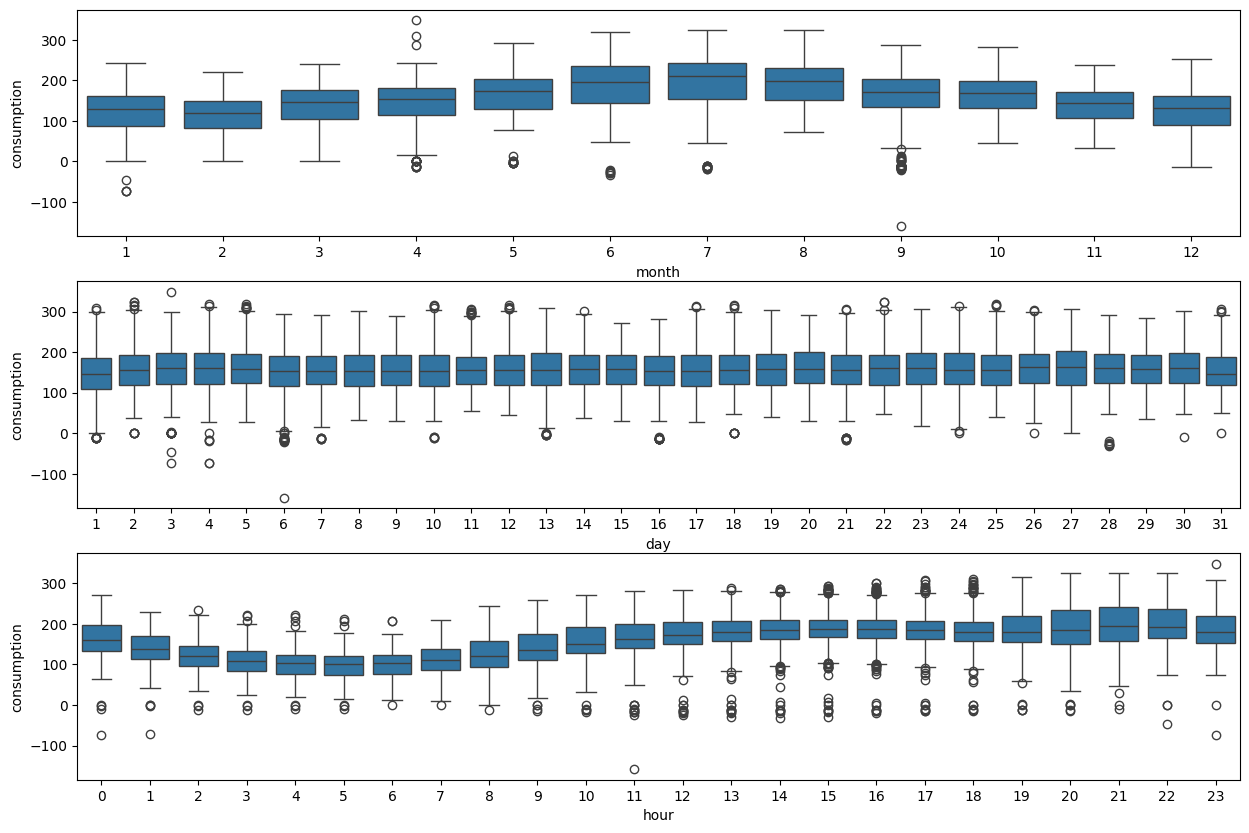

In [68]:
import seaborn as sns

data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="month", y="consumption",data=data,ax=axes[0])
sns.boxplot(x="day", y="consumption",data=data,ax=axes[1])
sns.boxplot(x="hour", y="consumption",data=data,ax=axes[2])

In [69]:
data["year"]=data["date"].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34913 entries, 2018-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   consumption  34913 non-null  float64       
 1   date         34913 non-null  datetime64[ns]
 2   day          34913 non-null  int32         
 3   hour         34913 non-null  int32         
 4   month        34913 non-null  int32         
 5   year         34913 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4)
memory usage: 1.3 MB


In [70]:
data_ys_ajahuel=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_ys_ajahuel.to_csv("data_ys_ajahuel.csv")

In [71]:
from datetime import datetime
ys=[]
xs=[]
archivo=open("data_ys_ajahuel.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

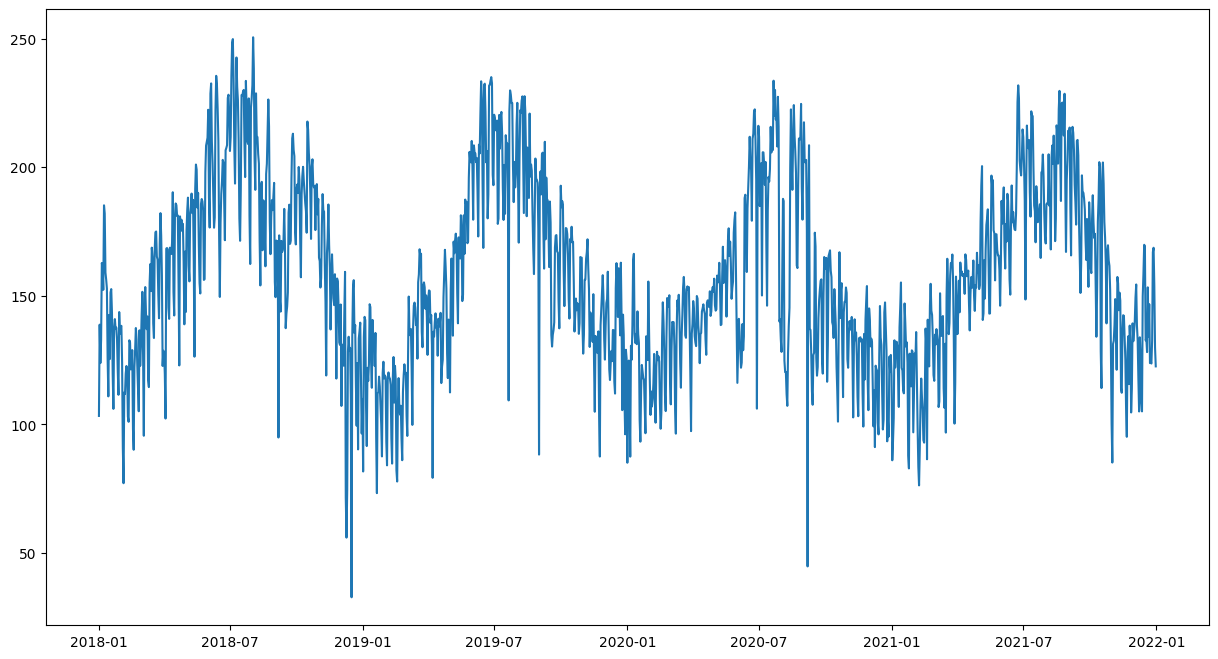

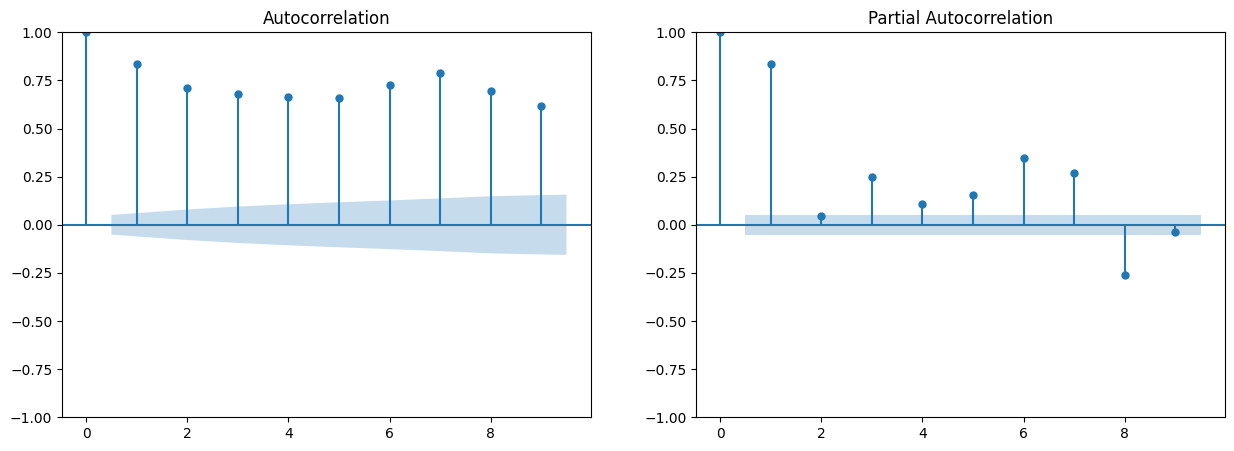

In [72]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [73]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.507892
p-value: 0.113566
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [74]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [75]:
modelo_ajahuel_d=ARIMA(ys,order=(8,0,8))
m_ad1=modelo_ajahuel_d.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

MSE 217.61601092518234
AIC 12040.618779281886
MAPE 0.07247050853893487


c:\Users\56961\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


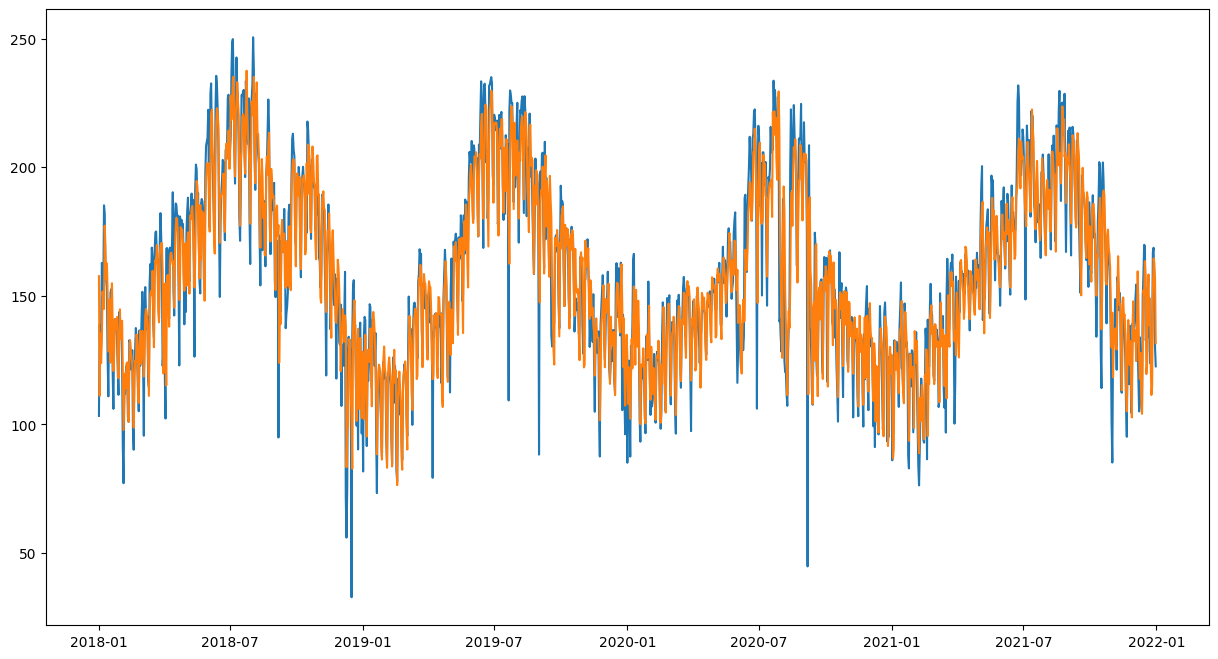

In [76]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys,xs,ysp);

In [77]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

1453


In [78]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [79]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import SimpleRNN, Input, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [80]:
seed=12122008
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [81]:
model = Sequential()
model.add(Input(name="serie",shape=(8,1)))
model.add(SimpleRNN(256))
model.add(Dense(128))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 256)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,073 (387.00 KB)

 Trainable params: 99,073 (387.00 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 24882.9121 - mae: 153.5385 - mape: 97.1389 - mse: 24882.9121
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 18988.9238 - mae: 132.9746 - mape: 83.3449 - mse: 18988.9238
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13719.8008 - mae: 111.4294 - mape: 68.9436 - mse: 13719.8008
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9065.7842 - mae: 88.1530 - mape: 53.4816 - mse: 9065.7842  
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5328.2905 - mae: 64.0653 - mape: 37.7718 - mse: 5328.2905
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2804.3020 - mae: 42.8547 - mape: 24.9072 - mse: 2804.3020
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1563.4530 - mae: 31.3674 - mape: 19.6556 - mse: 1563.4530
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1295.8198 - mae: 30.0227 - mape: 21.0086 - mse: 1295.8198
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1407.1268 - mae

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


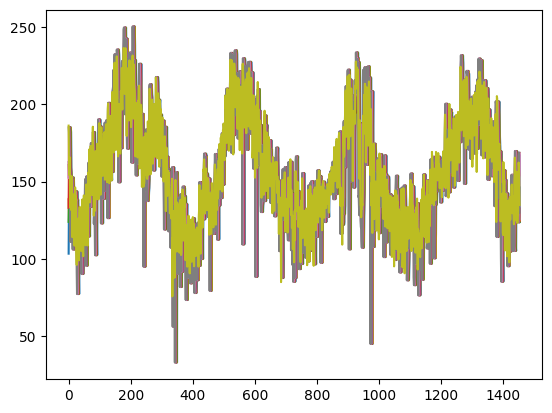

In [83]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

In [84]:
model = Sequential()
model.add(Input(name="serie",shape=(8,1)))
model.add(SimpleRNN(256))
model.add(Dense(128))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 256)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,073 (387.00 KB)

 Trainable params: 99,073 (387.00 KB)

 Non-trainable params: 0 (0.00 B)

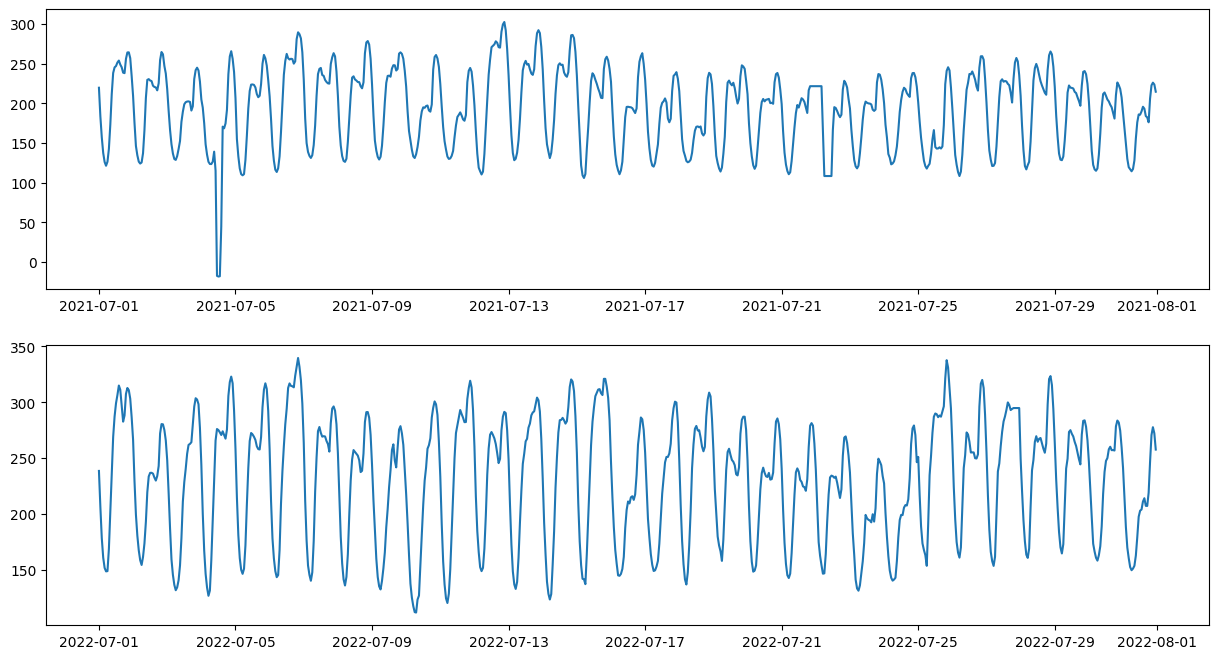

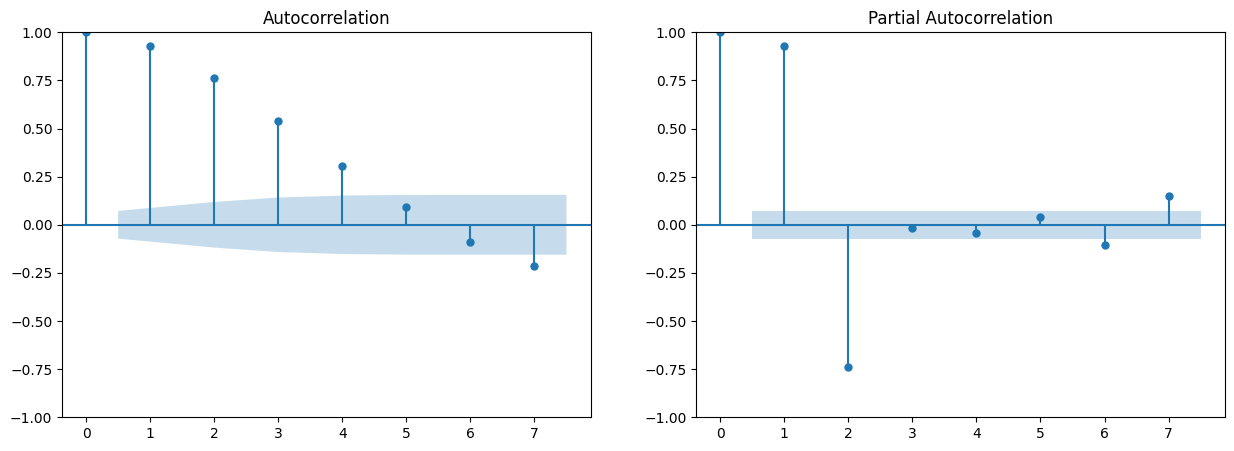

In [85]:
subestacion="AJAHUEL"
filtro="substation=='{0}' and date.dt.year==2021 and date.dt.month==7".format(subestacion)
ym=ds_train.query(filtro)["consumption"]
xm=ds_train.query(filtro).index
filtro="substation=='{0}' and date.dt.year==2022 and date.dt.month==7".format(subestacion)
ytm=ds_test.query(filtro)["consumption"]
xtm=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(xm,ym);
axes[1].plot(xtm,ytm);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ym,lags=7,ax=axes[0]);
plot_pacf(ym,lags=7,method="ywm",ax=axes[1]);

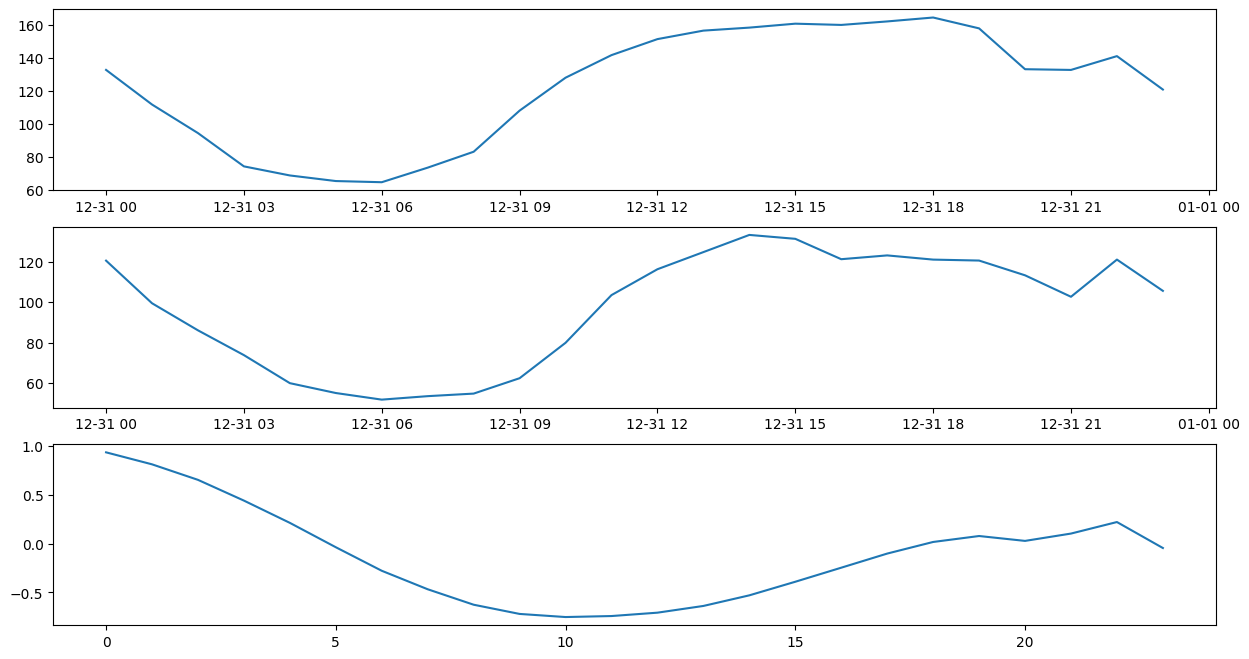

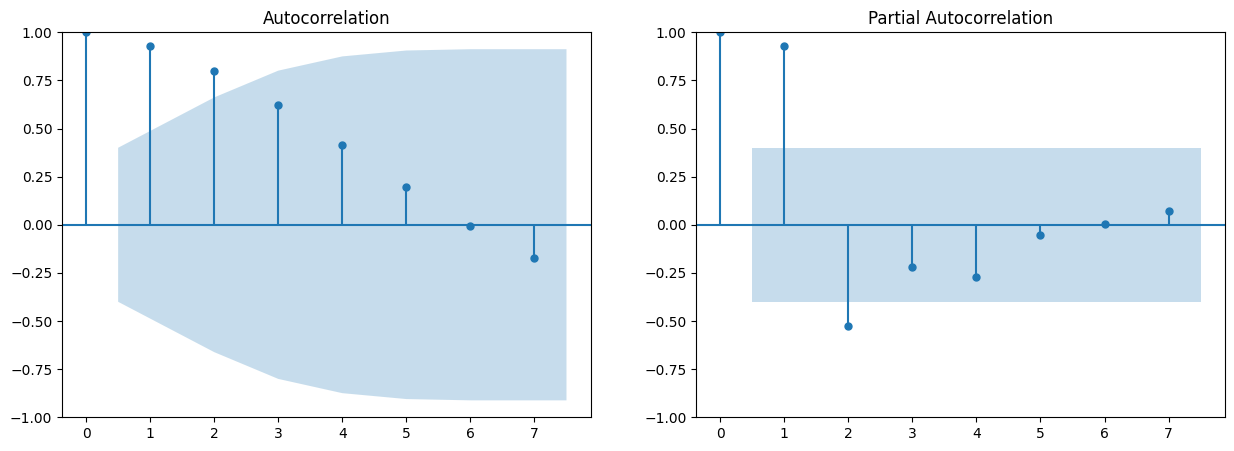

In [86]:
subestacion="AJAHUEL"
filtro="substation=='{0}' and date.dt.year==2021 and date.dt.month==12 and date.dt.day==31".format(subestacion)
yd=ds_train.query(filtro)["consumption"]
xd=ds_train.query(filtro).index
filtro="substation=='{0}' and date.dt.year==2022 and date.dt.month==12 and date.dt.day==31".format(subestacion)
ytd=ds_test.query(filtro)["consumption"]
xtd=ds_test.query(filtro).index
c_yd_ytd=sm.tsa.stattools.ccf(yd, ytd);
fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 8)
axes[0].plot(xd,yd);
axes[1].plot(xtd,ytd);
axes[2].plot(c_yd_ytd);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(yd,lags=7,ax=axes[0]);
plot_pacf(yd,lags=7,method="ywm",ax=axes[1]);

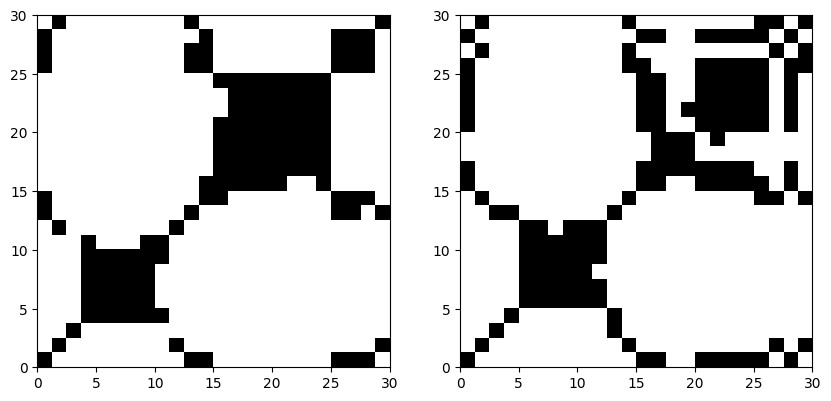

In [87]:
from pyts.image import RecurrencePlot
#Matriz de recurrencia
rp = RecurrencePlot(threshold=10)
y_rp = rp.transform(np.array([yd]))
yt_rp = rp.transform(np.array([ytd]))

fig, axes = plt.subplots(1,2)
fig.set_size_inches(10, 5)
axes[0].imshow(y_rp[0], cmap='binary', origin='lower',extent=[0, 30, 0, 30]);
axes[1].imshow(yt_rp[0], cmap='binary', origin='lower',extent=[0, 30, 0, 30]);

#### Matriz de recurrencia

La matriz de recurrencia muestra todos los momentos en los que un estado específico (una combinación particular de valores de variables) se repite en una serie de tiempo.

Cada punto en el gráfico representa un estado específico en la serie de tiempo.
Los bloques oscuros en los gráficos indican recurrencia; es decir, momentos en los que el sistema ha visitado estados similares previamente.

Observaciones específicas:
- Primer Gráfico (Datos de Entrenamiento):
Tiene una estructura similar a una “L” invertida con un bloque negro grande en la parte superior derecha.
Esto sugiere que ciertos estados se repiten en los datos de entrenamiento.
- Segundo Gráfico (Datos de Prueba):
Tiene una estructura similar a una “X”, con un bloque negro adicional grande en la parte superior derecha.
También muestra recurrencia, pero con patrones ligeramente diferentes a los datos de entrenamiento.

Significado:
Los Recurrence Plots ayudan a identificar patrones, ciclos y regularidades en los datos.
La presencia de bloques oscuros indica que ciertos estados se repiten, lo que puede ser útil para modelar y predecir el comportamiento futuro.

In [88]:
model = Sequential()
model.add(Input(name="serie",shape=(8,1)))
model.add(SimpleRNN(256))
model.add(Dense(128))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)        │ (None, 256)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,073 (387.00 KB)

 Trainable params: 99,073 (387.00 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=200, shuffle=True, verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 24539.0703 - mae: 152.4145 - mape: 96.3900 - mse: 24539.0703
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18483.1895 - mae: 131.0499 - mape: 82.0525 - mse: 18483.1895
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13130.6973 - mae: 108.7293 - mape: 67.1355 - mse: 13130.6973
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8524.5400 - mae: 85.0374 - mape: 51.4195 - mse: 8524.5400
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4925.1143 - mae: 61.0103 - mape: 35.8353 - mse: 4925.1143
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2570.0857 - mae: 40.6811 - mape: 23.7302 - mse: 2570.0857
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1483.5431 - mae: 30.7907 - mape: 19.6093 - mse: 1483.5431
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1302.1338 - mae: 30.1677 - mape: 21.3321 - mse: 1302.1338
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1422.

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


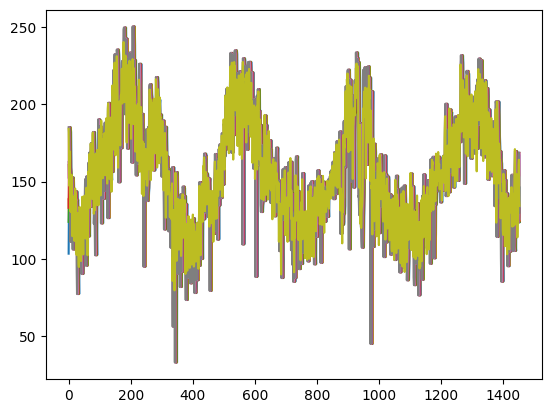

In [90]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

In [91]:
model = Sequential()
model.add(Input(name="serie",shape=(8,1)))
model.add(SimpleRNN(256))
model.add(Dense(128))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)        │ (None, 256)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,073 (387.00 KB)

 Trainable params: 99,073 (387.00 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
from keras.layers import Attention,MultiHeadAttention, Input, Dense, Flatten
from keras.models import Model

In [93]:
d=128
input=Input(name="activity",shape=(8,1))
q = Dense(name="wq",units=d)(input)
k = Dense(name="wk",units=d)(input)
v = Dense(name="wv",units=d)(input)
attention= Attention()([q, v, k],return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_ajahuel=Model(inputs=input,outputs=output)
model_att_ajahuel.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wq (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wv (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wk (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_2         │ (None, 8, 128)    │          0 │ wq[0][0],         │
│ (Attention)         │                   │            │ wv[0][0],         │
│                     │                   │            │ wk[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 8, 128)    │     16,512 │ attention_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1024)      │          0 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 1)         │      1,025 │ flatten_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 18,305 (71.50 KB)

 Trainable params: 18,305 (71.50 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
tag="att_ajahuel_"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_ajahuel.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_ajahuel.fit(yw, yt, batch_size=256, shuffle=False, epochs=20,verbose=1,callbacks=[tensorboard_callback])
model_att_ajahuel.save(log_dir+'/model_att_ajahuel_{0}.keras'.format(tag))

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 16975.3203 - mae: 115.1074 - mape: 70.7980 - mse: 16975.3203
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3477.7786 - mae: 50.1023 - mape: 33.1937 - mse: 3477.7786
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1244.3650 - mae: 27.0775 - mape: 17.9183 - mse: 1244.3650
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1942.7759 - mae: 37.6631 - mape: 23.3667 - mse: 1942.7759
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 939.3899 - mae: 23.8052 - mape: 15.8256 - mse: 939.3899
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1066.7538 - mae: 25.1227 - mape: 17.0894 - mse: 1066.7538
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 831.8697 - mae: 21.5748 - mape: 14.4785 - mse: 831.8697
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 933.6074 - mae: 23.4907 - mape: 15.3987 - mse: 933.6074
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 829.6677 - mae: 21.8573 - 

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


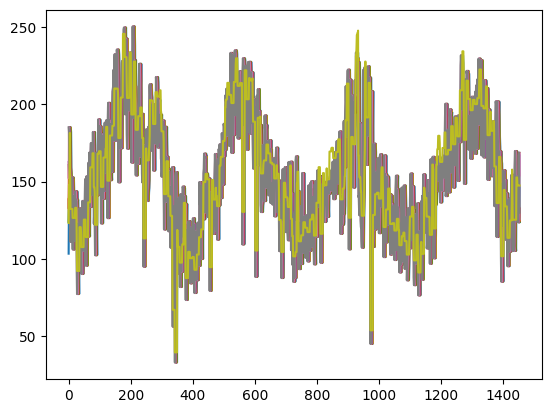

In [95]:
xw=[i for i in range(len(yw))]
yp=model_att_ajahuel.predict(yw)
plt.plot(xw,yw,xw,yp)

In [96]:
d=128
input=Input(name="activity",shape=(8,1))
q = Dense(name="wq",units=d)(input)
k = Dense(name="wk",units=d)(input)
v = Dense(name="wv",units=d)(input)
attention= Attention()([q, v, k],return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_ajahuel=Model(inputs=input,outputs=output)
model_att_ajahuel.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wq (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wv (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wk (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_3         │ (None, 8, 128)    │          0 │ wq[0][0],         │
│ (Attention)         │                   │            │ wv[0][0],         │
│                     │                   │            │ wk[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 8, 128)    │     16,512 │ attention_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 1024)      │          0 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 1)         │      1,025 │ flatten_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 18,305 (71.50 KB)

 Trainable params: 18,305 (71.50 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
tag="att_ajahuel_"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_ajahuel.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_ajahuel.fit(yw, yt, batch_size=256, shuffle=True, epochs=20,verbose=1,callbacks=[tensorboard_callback])
model_att_ajahuel.save(log_dir+'/model_att_ajahuel_{0}.keras'.format(tag))

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 12015.6240 - mae: 93.5224 - mape: 59.2523 - mse: 12015.6240
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4322.2168 - mae: 59.1020 - mape: 40.5781 - mse: 4322.2168
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1119.1793 - mae: 27.7999 - mape: 17.4394 - mse: 1119.1793
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1060.7390 - mae: 27.3125 - mape: 17.2581 - mse: 1060.7390
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 770.8928 - mae: 20.7546 - mape: 15.4930 - mse: 770.8928
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 527.1060 - mae: 17.3785 - mape: 12.6494 - mse: 527.1060
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 571.3092 - mae: 19.4433 - mape: 12.7673 - mse: 571.3092
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 453.1623 - mae: 16.2272 - mape: 11.5572 - mse: 453.1623
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 482.5894 - mae: 16.3792 - map

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


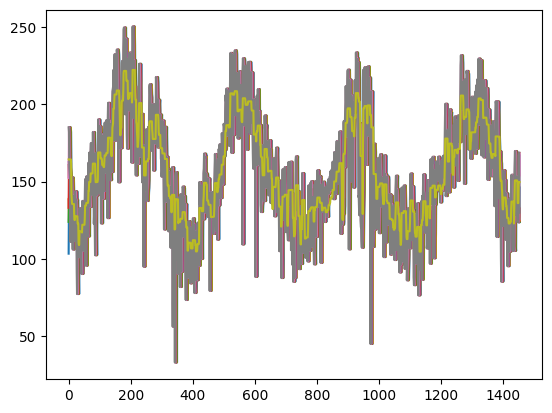

In [98]:
xw=[i for i in range(len(yw))]
yp=model_att_ajahuel.predict(yw)
plt.plot(xw,yw,xw,yp)

In [99]:
d=128
input=Input(name="activity",shape=(8,1))
attention = MultiHeadAttention(num_heads=1,key_dim=d)(input, input, input,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_mhatt_ajahuel=Model(inputs=input,outputs=output)
model_mhatt_ajahuel.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 8, 1)      │        897 │ activity[0][0],   │
│ (MultiHeadAttentio… │                   │            │ activity[0][0],   │
│                     │                   │            │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 8, 128)    │        256 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 1024)      │          0 │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 1)         │      1,025 │ flatten_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,178 (8.51 KB)

 Trainable params: 2,178 (8.51 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
tag="mhatt_chena"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_mhatt_ajahuel.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_mhatt_ajahuel.fit(yw, yt, batch_size=256, epochs=200, shuffle=False, verbose=1,callbacks=[tensorboard_callback])
model_mhatt_ajahuel.save(log_dir+'/model_att_chena{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 27620.5215 - mae: 161.7259 - mape: 100.9911 - mse: 27620.5215
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20643.9824 - mae: 138.9967 - mape: 86.3896 - mse: 20643.9824
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7629.7407 - mae: 80.0979 - mape: 48.7933 - mse: 7629.7407   
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1196.2389 - mae: 26.8961 - mape: 19.0805 - mse: 1196.2389
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2964.8247 - mae: 48.2325 - mape: 33.0691 - mse: 2964.8247
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 557.8016 - mae: 18.6359 - mape: 12.7750 - mse: 557.8016
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1164.8070 - mae: 29.6107 - mape: 18.1618 - mse: 1164.8070
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 657.3889 - mae: 20.8368 - mape: 13.4495 - mse: 657.3889
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 551.2839

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


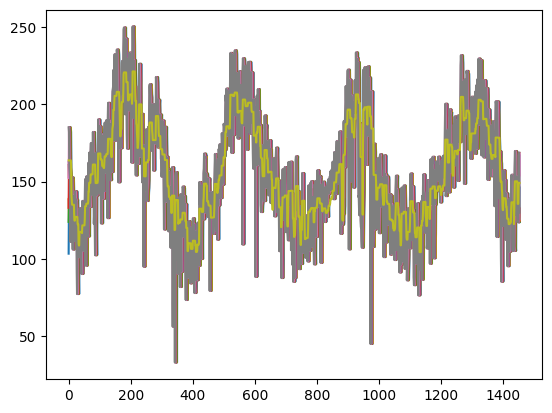

In [101]:
xw=[i for i in range(len(yw))]
yp=model_mhatt_ajahuel.predict(yw)
plt.plot(xw,yw,xw,yp)

In [102]:
d=128
input=Input(name="activity",shape=(8,1))
attention= MultiHeadAttention(num_heads=1,key_dim=d)(input, input, input,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_mhatt_ajahuel=Model(inputs=input,outputs=output)
model_mhatt_ajahuel.summary()

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 8, 1)      │        897 │ activity[0][0],   │
│ (MultiHeadAttentio… │                   │            │ activity[0][0],   │
│                     │                   │            │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 8, 128)    │        256 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 1024)      │          0 │ dense_24[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 1)         │      1,025 │ flatten_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,178 (8.51 KB)

 Trainable params: 2,178 (8.51 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
tag="mhatt_chena"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_mhatt_ajahuel.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_mhatt_ajahuel.fit(yw, yt, batch_size=256, epochs=200, shuffle=True, verbose=1,callbacks=[tensorboard_callback])
model_mhatt_ajahuel.save(log_dir+'/model_att_chena{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 26669.4707 - mae: 159.1884 - mape: 100.8888 - mse: 26669.4707
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19765.0938 - mae: 136.5973 - mape: 86.3857 - mse: 19765.0938
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8749.4434 - mae: 88.3503 - mape: 55.5493 - mse: 8749.4434   
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1347.4823 - mae: 29.2625 - mape: 19.9142 - mse: 1347.4823
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2089.3503 - mae: 37.7765 - mape: 25.4547 - mse: 2089.3503
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1092.6071 - mae: 25.5146 - mape: 17.4369 - mse: 1092.6071
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 995.3912 - mae: 24.2465 - mape: 15.9410 - mse: 995.3912
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1013.3517 - mae: 24.5615 - mape: 16.1216 - mse: 1013.3517
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 822.57

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


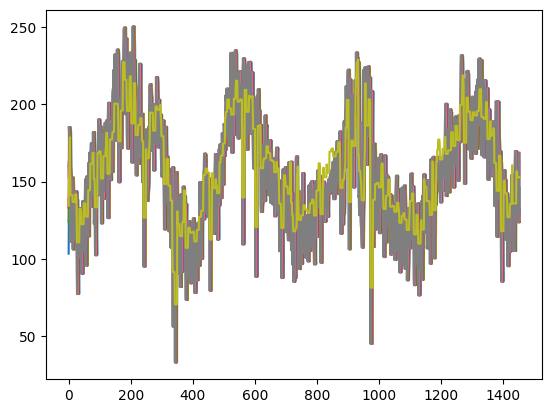

In [104]:
xw=[i for i in range(len(yw))]
yp=model_mhatt_ajahuel.predict(yw)
plt.plot(xw,yw,xw,yp)